In [ ]:
!pip install torchvision

In [ ]:
!pip install torchmetrics

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import nn, optim #nn-neural network (nn.Linear, nn.Conv2d) - optim - optim.SGD, optim.Adam, etc
from torch.utils.data import DataLoader #To load the dataset in batches. Handles shuffling, batching and parleel loading of data
import torch.nn.functional as F #Contain activation function (F.softmax, F.relu)
from tqdm import tqdm #visually shows how many batches have been processed during training/ testing (i.e. privides a progress)

import torchvision #library for image datasets(like MNIST), models(like ResNet, AlexNet, etc), transormation(process and prepare images, including resize, crop, etc)
import torchvision.datasets as datasets #to call datasets (for eg: datasets.MNIST)
import torchvision.transforms as transforms #To process and prepare images like "transforms.ToTensor()":convert PIL -> Tensor

import torchmetrics #Provides standard ML metrics like Accuracy, Precision, Recall,

In [ ]:
class CNN(nn.Module):
  def __init__(self, in_channels, num_classes):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=in_channels, out_channels=8, kernel_size=3, padding=1) # 1st convolutional layer
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2) # Max pooling layer
    self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1) # 2nd convolutional layer
    self.fc1 = nn.Linear(16 * 7 * 7, num_classes) # Fully connected layer

  def forward(self, x):
    x = F.relu(self.conv1(x))  # Apply first convolution and ReLU activation
    x = self.pool(x)           # Apply max pooling
    x = F.relu(self.conv2(x))  # Apply second convolution and ReLU activation
    x = self.pool(x)           # Apply max pooling
    x = x.reshape(x.shape[0], -1)  # Flatten the tensor
    x = self.fc1(x)            # Apply fully connected layer
    return x

In [ ]:
#Settingup the device
"""Pytorch can run on both CPUs and GPUs I will setup the device to use GPU if available, otherwise, I will use a CPU."""

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
# Hyper-parameters
input_size = 784
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 10

In [ ]:
"""
root='dataset/', is the folder where the data will be stored/downloaded. If 'dataset/' does not exist, it will be created.
train=True will load training set if it was False instead of True it will load test data
transform=transforms.ToTensor()- converts each image from Python Image Library(PIL) into a PyTorch tensor and
Also normalizes the pixel values from [0, 255] → [0.0, 1.0].
download=True - downloads the dataset if it's not already present
"""
train_dataset = datasets.MNIST(root='dataset/', train=True, transform=transforms.ToTensor(), download=True) #Download and load the training portion of MNIST dataset(60000 images)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True) #do the batching and shuffling of train data sets
test_dataset = datasets.MNIST(root='dataset/', train=False, transform=transforms.ToTensor(), download=True) #Load the test portion of MNIST(10000 images)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True) #do the batching and shuffling of test data set

labels: tensor([8, 4, 6, 0, 7, 1, 2, 2, 3, 1, 5, 5, 5, 9, 9, 8, 6, 3, 9, 2, 0, 7, 2, 7,
        7, 4, 0, 5, 9, 7, 3, 0, 8, 8, 5, 9, 9, 6, 0, 3, 8, 6, 4, 9, 2, 2, 0, 5,
        1, 0, 0, 7, 4, 9, 8, 9, 5, 0, 1, 9, 0, 4, 1, 7])


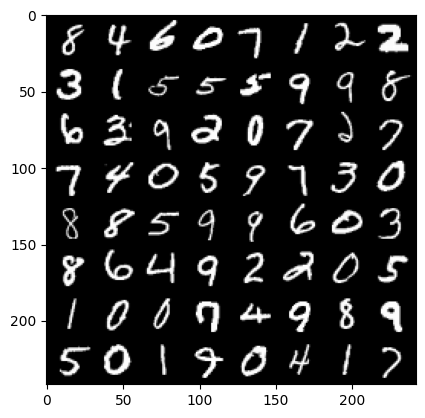

In [ ]:
def imshow(image):
  npimage = image.numpy() # Converts Tensor to Numpyarray since matplotlib expect numpyarray
  """images are usually in Channel Hieght Width (CHW) format in pytorch but
   matplotlib expects in Hieght Width Channel (HWC) format so we reorder the dimension of array"""
  plt.imshow(np.transpose(npimage,(1,2,0)))
  plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)
print('labels:',labels)
imshow(torchvision.utils.make_grid(images))

In [ ]:
model = CNN(in_channels=1, num_classes=10).to(device)
print(model)

CNN(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)


In [ ]:
""""gets the device (CPU or GPU) where the model is stored.
It's useful to move inputs or labels to the same device during training"""

device = next(model.parameters()).device

In [ ]:
#Define Loss and Optimizer
"""usingcross-entropy loss for classification and the Adam optimizer to update the model’s weights"""
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(num_epochs):
  print(f"Epoch [{epoch + 1}/{num_epochs}]")

  for batch_index, (data, targets) in enumerate(tqdm(train_loader)):
    data = data.to(device) #Moves data to the same device as the model
    targets = targets.to(device) #Moves labels to the same device as the model
    scores = model(data) #process the data(input) and returns raw score for each class (shape - (batch_size, 10))
    loss = criterion(scores, targets) #computes the difference between predicted class scores and true labels
    optimizer.zero_grad() #clears the gradients from previous step
    loss.backward() #backpropagation (computes gradient of loss w.r.t parameters)
    optimizer.step() #update weight (Applies the gradients to update the parameters using Adam)

Epoch [1/10]


100%|██████████| 938/938 [00:30<00:00, 31.11it/s]


Epoch [2/10]


100%|██████████| 938/938 [00:23<00:00, 39.97it/s]


Epoch [3/10]


100%|██████████| 938/938 [00:23<00:00, 39.98it/s]


Epoch [4/10]


100%|██████████| 938/938 [00:22<00:00, 40.80it/s]


Epoch [5/10]


100%|██████████| 938/938 [00:23<00:00, 39.66it/s]


Epoch [6/10]


100%|██████████| 938/938 [00:23<00:00, 39.98it/s]


Epoch [7/10]


100%|██████████| 938/938 [00:23<00:00, 40.14it/s]


Epoch [8/10]


100%|██████████| 938/938 [00:23<00:00, 40.42it/s]


Epoch [9/10]


100%|██████████| 938/938 [00:22<00:00, 40.82it/s]


Epoch [10/10]


100%|██████████| 938/938 [00:22<00:00, 41.43it/s]


In [ ]:
from torchmetrics.classification import Accuracy

acc = Accuracy(task="multiclass", num_classes=10).to(device)
acc.reset()
model.eval()
with torch.no_grad():
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, preds = torch.max(outputs, 1)
    acc.update(preds, labels)

test_accuracy = acc.compute()
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.9885
